In [1]:
## Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Other imports 
from sklearn.model_selection import train_test_split

In [3]:
## Reading the data
qsar = pd.read_csv('../Data/qsar_fish_toxicity.csv', sep=';', header=None)
qsar.columns = ['CICO', 'SM1_Dz(Z)', 'GATS1i', 'NdsCH', 'NdssC', 'MLOGP', 'LC50(mol/L)']

## Looking into the data
df = qsar.copy()
df.head()

,CICO,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50(mol/L)
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


### Dataset Information
Data: Ballabio,Davide, Cassotti,Matteo, Consonni,Viviana, and Todeschini,Roberto. (2019). QSAR fish toxicity. UCI Machine Learning Repository. https://doi.org/10.24432/C5JG7B.  

This dataset was used to develop quantitative regression QSAR models to predict acute aquatic toxicity towards the fish Pimephales promelas (fathead minnow) on a set of 908 chemicals. LC50 data, which is the concentration that causes death in 50% of test fish over a test duration of 96 hours, was used as model response. The model comprised 6 molecular descriptors: MLOGP (molecular properties), CIC0 (information indices), GATS1i (2D autocorrelations), NdssC (atom-type counts), NdsCH ((atom-type counts), SM1_Dz(Z) (2D matrix-based descriptors).  

Details can be found in the quoted reference: M. Cassotti, D. Ballabio, R. Todeschini, V. Consonni. A similarity-based QSAR model for predicting acute toxicity towards the fathead minnow (Pimephales promelas), SAR and QSAR in Environmental Research (2015), 26, 217-243; doi: 10.1080/1062936X.2015.1018938

In [4]:
## Splitting the data into independent features and dependent features
X, y = df.drop('LC50(mol/L)', axis=1), df['LC50(mol/L)']

## Splitting the data into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=34)

In [5]:
## checking the number of rows and columns in the data
print(f"The number of rows in the data are {X_train.shape[0]}.\n")
print(f"The number of columns in the data are {X_train.shape[1]}.")

print(f"The number of rows in the data are {X_test.shape[0]}.\n")
print(f"The number of columns in the data are {X_test.shape[1]}.")

The number of rows in the data are 45.

The number of columns in the data are 6.
The number of rows in the data are 863.

The number of columns in the data are 6.


In [6]:
## Exploring the data
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 361 to 417
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CICO       45 non-null     float64
 1   SM1_Dz(Z)  45 non-null     float64
 2   GATS1i     45 non-null     float64
 3   NdsCH      45 non-null     int64  
 4   NdssC      45 non-null     int64  
 5   MLOGP      45 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.5 KB


All the independent features of data are numerical.

The more the variance a feature has, more will be its contribution in model building. In other words, variance can be considered as an information indicator for the feature. So, if any feature has a variance of zero then it won't contribute to the model building. This is the reason why we should get rid of features with zero variance from out data. I have found a good resource for this point to sink in. Read a medium block post [here](https://towardsdatascience.com/principal-component-analysis-pca-explained-visually-with-zero-math-1cbf392b9e7d) for the same.

In [7]:
## finding out if any feature has zero variance (numerical feature)
print("Numerical features having zero variance:\n")
for feature in X_train.columns:
    if X_train[feature].var() == 0:
        print(feature)

Numerical features having zero variance:



There is no feature with zero variance in the training data.

In [8]:
## checking the number of unique values in each of the  features
data = pd.concat([X_train, pd.DataFrame(y_train, columns=['LC50(mol/L)'])], axis=1)
for feature in data.columns:
    print(f"The unique values in the  feature named {feature} are {data[feature].unique()}, (Total of {data[feature].nunique()}).\n")

The unique values in the  feature named CICO are [2.442 3.012 2.218 1.925 2.836 2.685 3.651 3.896 1.951 2.386 3.323 4.205
 2.198 2.366 3.7   2.748 3.134 2.031 2.43  3.023 2.507 3.235 2.377 4.285
 1.961 3.252 1.512 3.461 3.247 2.636 2.125 2.719 3.98  3.459 3.763 1.634
 3.316 3.198 3.739 3.802 4.566 2.765 2.309 3.979], (Total of 44).

The unique values in the  feature named SM1_Dz(Z) are [0.934 0.223 0.923 1.318 0.693 0.405 1.151 0.134 1.232 1.512 0.798 0.891
 0.496 0.56  1.131 0.827 0.57  0.638 0.73  1.47  0.916 0.    0.357 0.331
 0.762 1.306], (Total of 26).

The unique values in the  feature named GATS1i are [0.984 0.76  1.074 0.595 1.43  1.145 0.911 1.571 1.878 0.857 1.134 1.046
 0.79  1.735 1.556 2.048 1.193 0.822 0.946 1.168 1.652 0.996 0.938 1.71
 1.215 1.077 0.879 1.12  0.889 0.999 1.537 2.292 1.723 1.483 0.878 1.093
 1.399 1.204 1.527 1.394 0.951 1.118 2.606 1.404], (Total of 44).

The unique values in the  feature named NdsCH are [0 1 4], (Total of 3).

The unique values in the

It seems that the columns namely NdsCH and NdssC are categorical in nature but are already encoded.

In [9]:
## Let's check the distribution of categories in the features NdsCH and NdssC
for feature in ['NdsCH', 'NdssC']:
    print(f"{X_train[feature].value_counts()}\n")

NdsCH
0    40
1     4
4     1
Name: count, dtype: int64

NdssC
0    28
1    11
2     5
6     1
Name: count, dtype: int64



**We can see that the feature named NdsCH is highly unbalanced. We need to deal with this issue.**

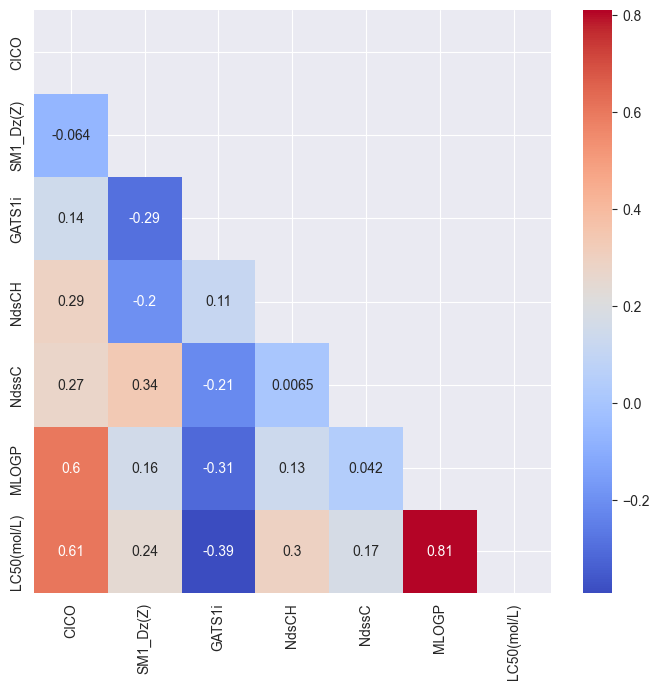

In [10]:
## checking the correlation between the  independent features and depedent feature LC50(mol/L)
sns.set_style('darkgrid')
plt.figure(figsize=(7,7))
data = pd.concat([X_train, pd.DataFrame(y_train, columns=['LC50(mol/L)'])], axis=1)
corr = data[data.columns].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap='coolwarm',mask=mask)
plt.tight_layout()

Here we can make following conclusions:
1. All the independent features except GATS1i are positively correlated with the dependent feature.
2. None of the independent features are highly correlated with each other.

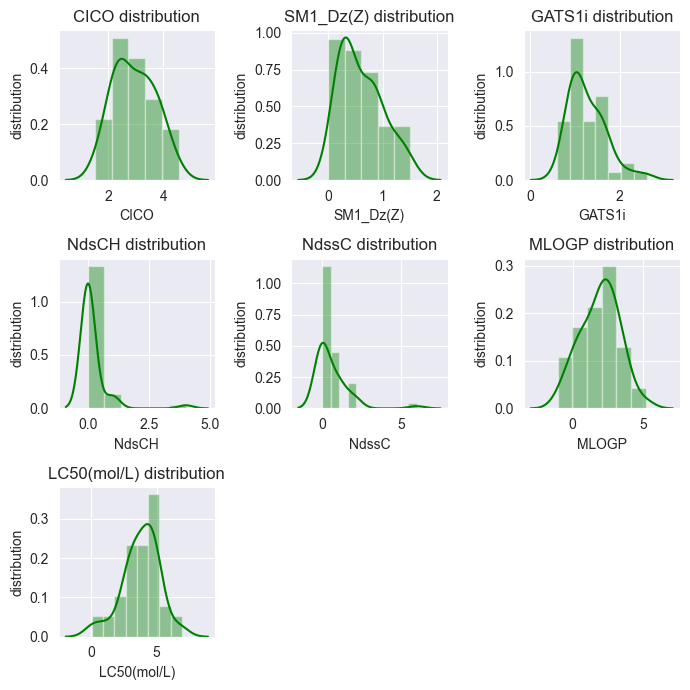

In [11]:
## checking the distribution of features

sns.set_style('darkgrid')
plt.figure(figsize=(7,7))
data = pd.concat([X_train, pd.DataFrame(y_train, columns=['LC50(mol/L)'])], axis=1)
for index, feature in enumerate(data.columns):
    plt.subplot(3,3,index+1)
    sns.distplot(data[feature],kde=True, color='g')
    plt.xlabel(feature)
    plt.ylabel('distribution')
    plt.title(f"{feature} distribution")

plt.tight_layout()

Most of the features look in normal distribution. NdsCH and NdssC are not in normal distibution but that's okay since they are categorical features encoded into numbers.

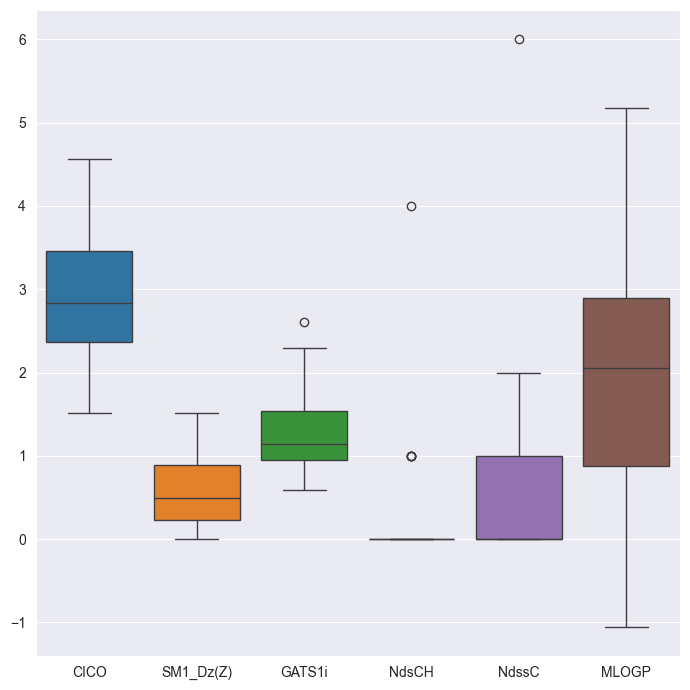

In [12]:
## finding out the outliers in the features using box plot
plt.figure(figsize=(7,7))
sns.boxplot(data=X_train[X_train.columns], orient='v')
plt.tight_layout()

**We have three features namely GATS1i, NdsCH, and NdssC that contains some amount of outliers. Since we have very small amount of training data, we will make use of machine learning algorithm that does not get affected by outliers' presence.**

In [13]:
## checking if the features have any missing values
miss_Val = pd.DataFrame()
miss_Val['Feature'] = X_train.columns
miss_Val['Missing_Value_Count'] = X_train[X_train.columns].isnull().sum().to_numpy()
miss_Val['Missing_Value_Percentage'] = miss_Val['Missing_Value_Count'].apply(lambda x: np.round(x/X_train.shape[0],2)*100)
miss_Val

,Feature,Missing_Value_Count,Missing_Value_Percentage
0,CICO,0,0.0
1,SM1_Dz(Z),0,0.0
2,GATS1i,0,0.0
3,NdsCH,0,0.0
4,NdssC,0,0.0
5,MLOGP,0,0.0


The data has no missing values. That's great!

In [14]:
## Let's check if the data contains duplicate records
data = pd.concat([X_train, pd.DataFrame(y_train, columns=['LC50(mol/L)'])], axis=1)
data[data.duplicated()]

,CICO,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50(mol/L)


It seems there are no duplicated records in our data.